## Introduction
#### In this project we will build a classifiacation model where according to different features we can tell if a women will be having any extra marital affairs.
#### The dataset used has 9 columns that we will divide into 8 features and 1 target column
***The Columns are Given as:***

- Rate_marriage: Women’s rating for her marriage
- Age: Women's Age
- Years_Married: Number of years married
- Children: Number of Children She has
- Religious: On the scale of 1 -5 whether she believe in religion or not
- Education: Level of education of Women
- Occupation: Occupation of women
- Occupation_husb: Occupation of Husband
- Affairs: Will have extra marital affair or not(0: will have affair, 1: will not have affair)


In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrices
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
%matplotlib inline
sns.set_style('dark')

In [2]:
#loading the dataset and checking the first five entries
data = sm.datasets.fair.load_pandas().data
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [3]:
#changing the values of affairs column to binary
data.loc[data['affairs']>0, 'affairs'] = 1
data.loc[data['affairs']<=0, 'affairs'] = 0
data['affairs'] = data['affairs'].astype(int)
(data.affairs>0).astype(int)
data.affairs.unique()

array([1, 0])

In [4]:
#reconstructing the dataFrame
y,X=dmatrices('affairs~rate_marriage + age + yrs_married + children +  religious + educ + C(occupation)+C(occupation_husb)',data,
                                  return_type="dataframe")
X.drop(['Intercept'], axis=1, inplace=True)
X.head()

,C(occupation)[T.2.0],C(occupation)[T.3.0],C(occupation)[T.4.0],C(occupation)[T.5.0],C(occupation)[T.6.0],C(occupation_husb)[T.2.0],C(occupation_husb)[T.3.0],C(occupation_husb)[T.4.0],C(occupation_husb)[T.5.0],C(occupation_husb)[T.6.0],rate_marriage,age,yrs_married,children,religious,educ
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [5]:
#renaming the column
X = X.rename(columns ={'C(occupation)[T.2.0]':'occ_2','C(occupation)[T.3.0]' : 'occ_3' ,'C(occupation)[T.4.0]' : 'occ_4','C(occupation)[T.5.0]':'occ_5','C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2', 'C(occupation_husb)[T.3.0]' :'occ_husb_3','C(occupation_husb)[T.4.0]':'occ_husb_4' , 'C(occupation_husb)[T.5.0]':'occ_husb_5', 'C(occupation_husb)[T.6.0]':'occ_husb_6'})
X.head()

,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [6]:
#Joining the target and feature columns
data = pd.concat([X,y.astype(int)], axis=1)
data.head()

,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ,affairs
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0,1
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0,1
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0,1
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0,1
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0,1


In [7]:
#checking dimension of data
data.shape

(6366, 17)

In [8]:
#checking for datatypes and any null values
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6366 entries, 0 to 6365
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   occ_2          6366 non-null   float64
 1   occ_3          6366 non-null   float64
 2   occ_4          6366 non-null   float64
 3   occ_5          6366 non-null   float64
 4   occ_6          6366 non-null   float64
 5   occ_husb_2     6366 non-null   float64
 6   occ_husb_3     6366 non-null   float64
 7   occ_husb_4     6366 non-null   float64
 8   occ_husb_5     6366 non-null   float64
 9   occ_husb_6     6366 non-null   float64
 10  rate_marriage  6366 non-null   float64
 11  age            6366 non-null   float64
 12  yrs_married    6366 non-null   float64
 13  children       6366 non-null   float64
 14  religious      6366 non-null   float64
 15  educ           6366 non-null   float64
 16  affairs        6366 non-null   int32  
dtypes: float64(16), int32(1)
memory usage: 870.4 KB


In [9]:
#statistics of the data
data.describe(include='all')

,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,0.134936,0.437166,0.288093,0.116243,0.017122,0.205467,0.076971,0.318882,0.279453,0.083255,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,0.322495
std,0.341682,0.496075,0.452910,0.320541,0.129737,0.404074,0.266567,0.466080,0.448766,0.276289,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.467468
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,1.000000


#### We can see that there is no null values

In [10]:
#making a backup of the data
data_bckup = data.copy()

0    4313
1    2053
Name: affairs, dtype: int64


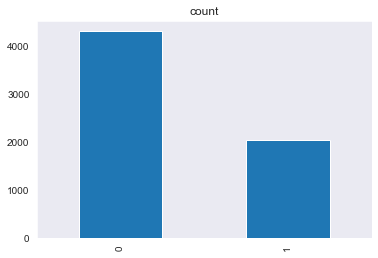

In [11]:
#count of affairs column
print(data['affairs'].value_counts())
data['affairs'].value_counts().plot(kind='bar', title='count')

**we can clearly see that the data is imbalanced**

In [12]:
# class count
class_count_0, class_count_1 = data['affairs'].value_counts()

# Separate class
class_0 = data[data['affairs'] == 0]
class_1 = data[data['affairs'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (4313, 17)
class 1: (2053, 17)


1    2053
0    2053
Name: affairs, dtype: int64


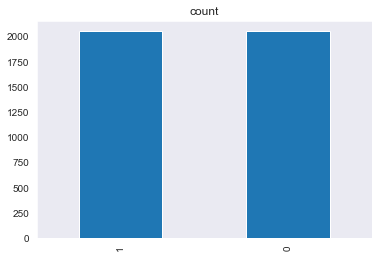

In [13]:
#Taking random rows equal to size of the lowest data counted 
class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis=0)

print(test_under['affairs'].value_counts())# plot the count after under-sampeling
test_under['affairs'].value_counts().plot(kind='bar', title='count')

**Now the data is balanced**

In [14]:
#storing the data 
data = test_under

## EDA

C:\Users\ARKAJIT\Anaconda3\envs\practice\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\ARKAJIT\Anaconda3\envs\practice\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\ARKAJIT\Anaconda3\envs\practice\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\ARKAJIT\Anaconda3\envs\practice\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\ARKAJIT\Anaconda3\envs\practice\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\A

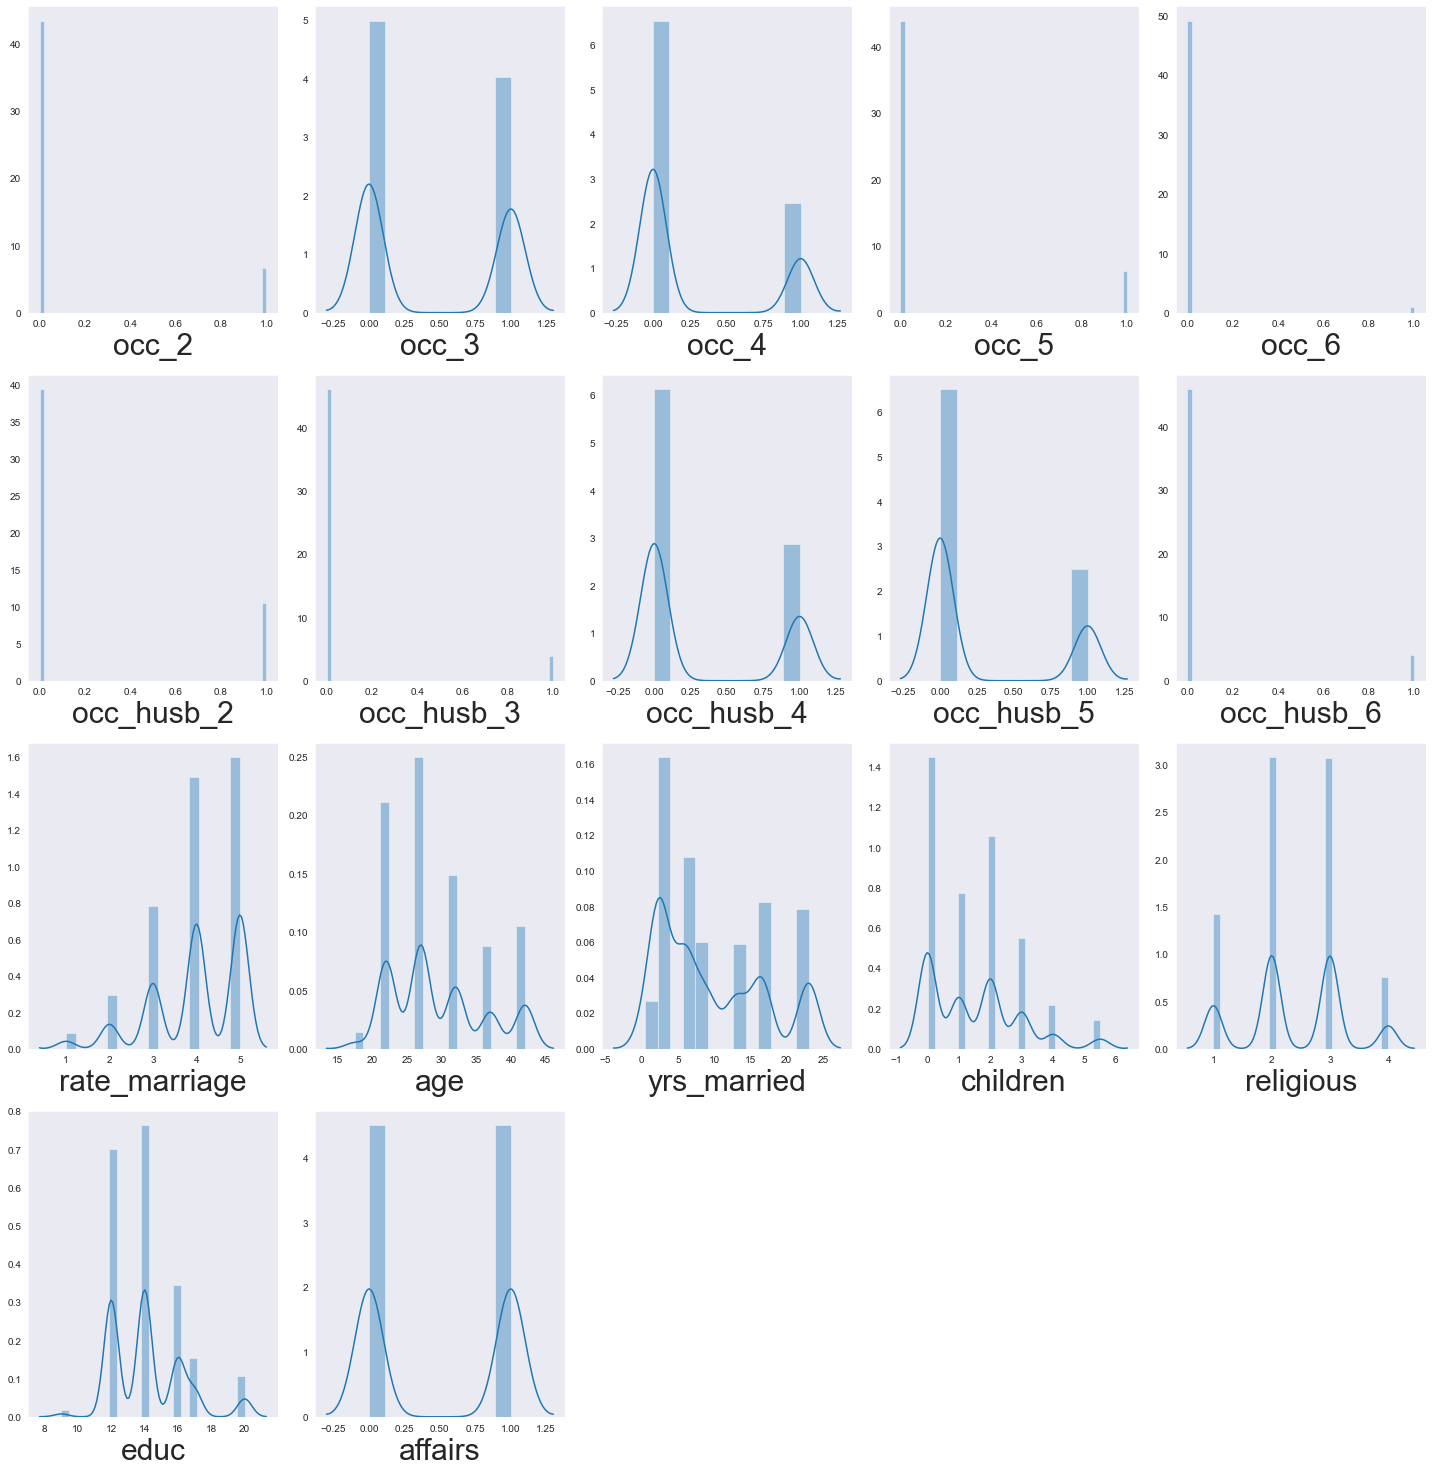

In [15]:
#checking if the data is normally disrtibuted
plt.figure(figsize=(20,25))
pltnumber = 1

for column in data.columns:
    if pltnumber<25:
        ax = plt.subplot(5,5,pltnumber)
        sns.distplot(data[column], ax=ax)
        plt.xlabel(column, fontsize=30)
    pltnumber+=1
plt.tight_layout()

Text(0, 0.5, 'count')

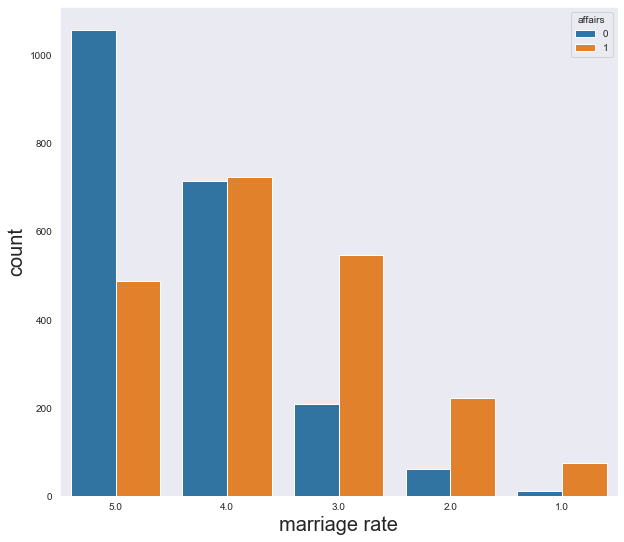

In [16]:
#visualing affairs with marriage rate
plt.figure(figsize=(10,9))
sns.countplot(x='rate_marriage', hue='affairs', data=data, order=data['rate_marriage'].value_counts().index)
plt.xlabel('marriage rate', fontsize=20)
plt.ylabel('count', fontsize=20)

We can see if marriage rate is not good then there is a very high chance of having extra marrital affairs

Text(0, 0.5, 'count')

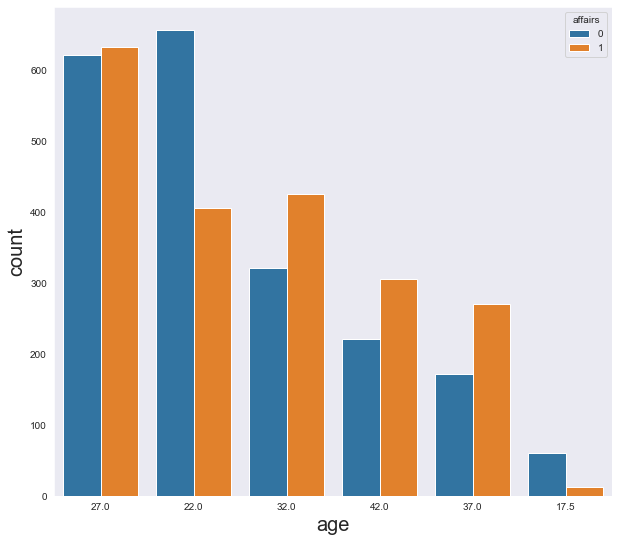

In [17]:
#visualing affairs with age
plt.figure(figsize=(10,9))
sns.countplot(x='age', hue='affairs', data=data, order=data['age'].value_counts().index)
plt.xlabel('age', fontsize=20)
plt.ylabel('count', fontsize=20)

 we can see that older women will have a high chance of having extra marital status

Text(0, 0.5, 'count')

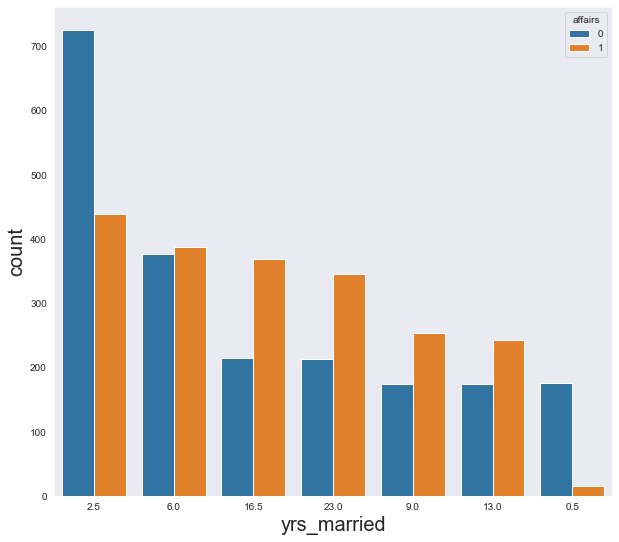

In [18]:
#visualing affairs with years of marriage
plt.figure(figsize=(10,9))
sns.countplot(x='yrs_married', hue='affairs', data=data, order=data['yrs_married'].value_counts().index)
plt.xlabel('yrs_married', fontsize=20)
plt.ylabel('count', fontsize=20)

 we can see as married couples spend more years together there is a high chance of having extra marital affairs wheras is case of newly married couples there is result of trust leading to negligible chance of having affairs

Text(0, 0.5, 'count')

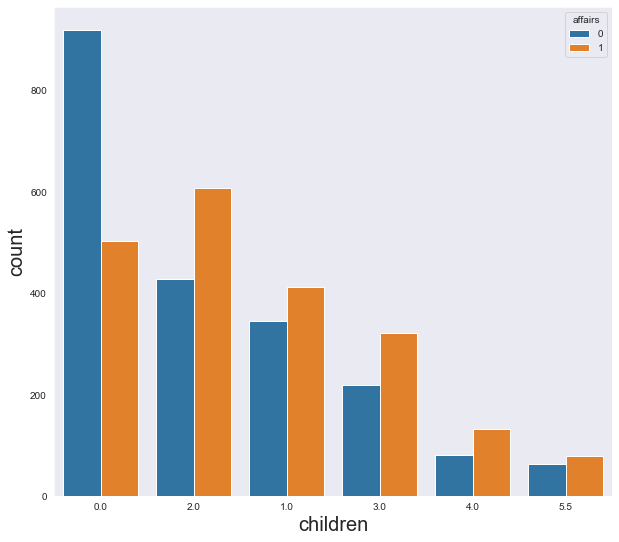

In [19]:
#visualing affairs with children
plt.figure(figsize=(10,9))
sns.countplot(x='children', hue='affairs', data=data, order=data['children'].value_counts().index)
plt.xlabel('children', fontsize=20)
plt.ylabel('count', fontsize=20)

 we can see that having more number of chidren leads to more chance of having extra-marital affairs

Text(0, 0.5, 'count')

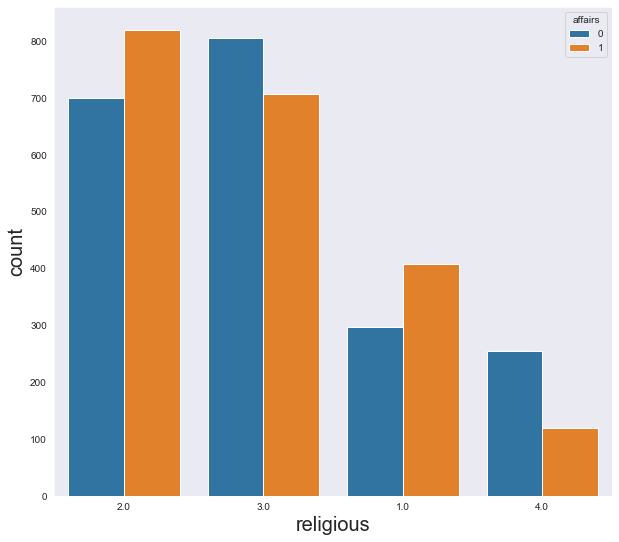

In [20]:
#visulazing affairs with religous
plt.figure(figsize=(10,9))
sns.countplot(x='religious', hue='affairs', data=data, order=data['religious'].value_counts().index)
plt.xlabel('religious', fontsize=20)
plt.ylabel('count', fontsize=20)

More religious person will have less chance of having extra marital affairs whereas less religious person will have high chance of having affairs

Text(0, 0.5, 'count')

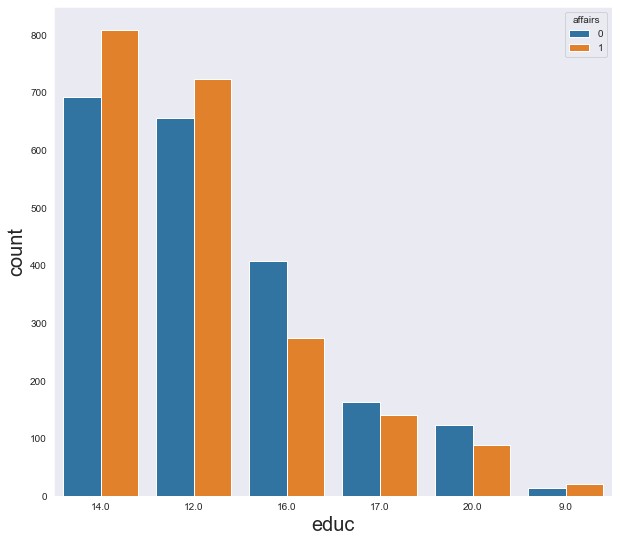

In [21]:
#visulazing affairs with education
plt.figure(figsize=(10,9))
sns.countplot(x='educ', hue='affairs', data=data, order=data['educ'].value_counts().index)
plt.xlabel('educ', fontsize=20)
plt.ylabel('count', fontsize=20)

 Women who is doing white collar jobs having less chance of affair and women with graduation and higher educational background also has less chance of affair but for those women who is in college and have lower literacy has shown more interest in extra marital affairs.

## Feature Engineering

In [22]:
#checking skewness of data
column_name = ['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ', 'affairs']
for column in column_name:
    print("{} = {}".format(column, data[column].skew()))

rate_marriage = -0.867437693240049
age = 0.5135566849874743
yrs_married = 0.6123365611511989
children = 0.8239269619106004
religious = 0.01069400671786512
educ = 0.8434731579409632
affairs = 0.0


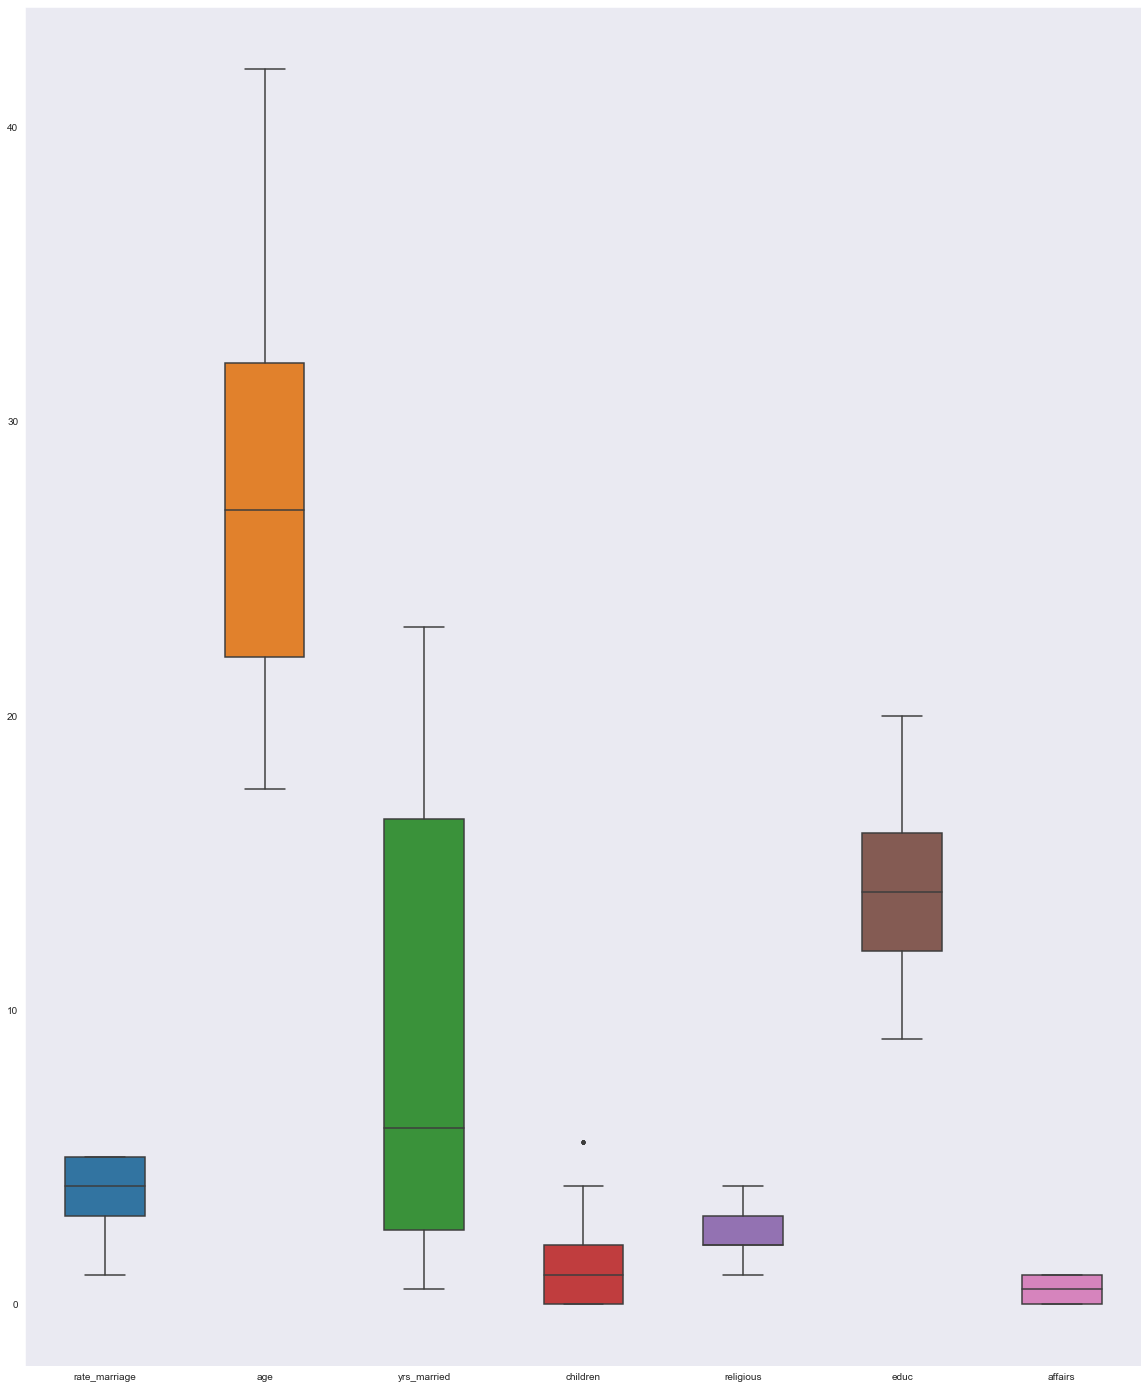

In [23]:
#checking for outliers
fig, ax = plt.subplots(figsize=(20,25))
sns.boxplot(data=data[['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ', 'affairs']], width=0.5, ax=ax, fliersize=3)

### Removing the outliers using Z-score

In [24]:
#getting the Z score values
from scipy import stats

z=np.abs(stats.zscore(data.rate_marriage))
print(z)

[0.99672969 0.98035828 0.99672969 ... 1.96890227 0.0081857  0.99672969]


In [25]:
#initializing a threshold
threshold=3
print(np.where(z>3))

(array([], dtype=int64),)


In [26]:
#filtering out the outliers
data = data[z<=3]

In [27]:
#scaling the feature columns
X = data[['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ']]
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [28]:
#Checking multicollinearity in data
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif['features'] = X.columns

In [29]:
vif

,VIF,features
0,1.031404,rate_marriage
1,5.475805,age
2,7.100314,yrs_married
3,2.427433,children
4,1.033078,religious
5,1.102691,educ


#### We can see that there is some multicollinearity in age and yrs-married so let join those datas

In [30]:
#joining age with marrige age
X['married_age'] = X.apply(lambda x: x['age']-x['yrs_married'], axis=1)
X.drop(['age', 'yrs_married'], axis=1, inplace=True)

C:\Users\ARKAJIT\Anaconda3\envs\practice\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ARKAJIT\Anaconda3\envs\practice\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [31]:
#scaling the data
X_scaled = sc.fit_transform(X)

In [32]:
#Checking multicollinearity in data
variables = X_scaled
vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif['features'] = X.columns

In [33]:
vif

,VIF,features
0,1.027436,rate_marriage
1,1.153852,children
2,1.030568,religious
3,1.098995,educ
4,1.191393,married_age


#### We can see that there is no multicollinearity in the data now

## Model Building

In [34]:
#merging the columns
X_new = pd.concat([data.drop(column_name, axis=1), X], axis=1)
X_new.head()

,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,children,religious,educ,married_age
2845,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,5.5,2.0,12.0,14.0
4103,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,3.0,17.0,18.0
5278,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,1.0,4.0,20.0,19.0
3733,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,0.0,3.0,12.0,21.5
3723,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,1.0,4.0,16.0,21.0


In [35]:
#setting the target variable
y=data['affairs']

In [36]:
#scaling the data
X_scaled = sc.fit_transform(X_new)

In [37]:
#splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=438)

In [38]:
#creating instance of of LogisticRegression and fitting the model
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [39]:
#predicting the test data
y_pred = lr.predict(X_test)

In [40]:
#train and test score
print('train score = ', lr.score(X_train, y_train))
print('test score = ', lr.score(X_test, y_test))

train score =  0.6868475991649269
test score =  0.6672077922077922


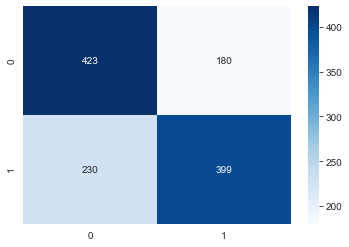

In [41]:
#creating confusion matrix to observe the precision of our model
conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True, fmt='', cmap='Blues')

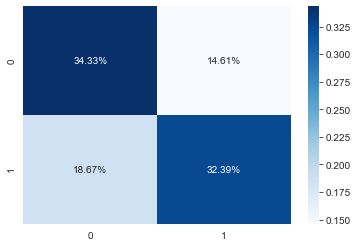

In [42]:
#observing the percentage of the result
sns.heatmap(conf/np.sum(conf), annot=True, fmt='.2%', cmap='Blues')

In [43]:
TP = conf[0][0] #True Positive
FP = conf[0][1] #False Positive
FN = conf[1][0] #False Negative
TN = conf[1][1] #True Negative

In [44]:
#calculation accurary
acc = (TP+TN)/(TP+FP+FN+TN)
acc

0.6672077922077922

In [45]:
#calculating recall
recall = TP/(TP+FN)
recall

0.6477794793261868

In [46]:
#calculating precision
precision = TP/(TP+FP)
precision

0.7014925373134329

In [47]:
#calculating f1 score
F1_score = (2*recall*precision)/(recall+precision)
F1_score

0.6735668789808917

In [48]:
#calculating area under curve
auc = roc_auc_score(y_test, y_pred)
auc

0.6679163799444747

In [49]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

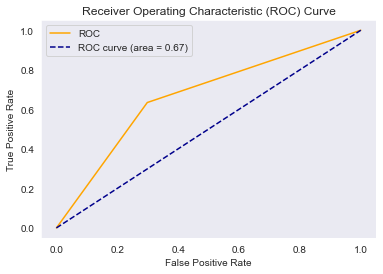

In [50]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

our precision is giving 68% which is fairly good and the f1 score is almost 66%

In [51]:
import pickle
pickle.dump(lr,open('final_model_v1.pkl', 'wb'))
pickle.dump(sc, open('final_scale_v1.pkl', 'wb'))